In [9]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [18]:
# -------------------------------
# Paths to your saved DL models
# Format: "Model Name": (path_to_model, input_size, color_mode)
# color_mode: 'grayscale' or 'rgb'
# -------------------------------
dl_model_paths = {
    "CNN": (r"C:\Users\kotaa\Downloads\emotion_recognition_1\emotion_recognition\cnn_emotion_model.h5", (48,48), 'grayscale'),
    "Hybrid": (r"C:\Users\kotaa\Downloads\emotion_recognition_1\emotion_recognition\cnn_lstm_emotion.h5", (48,48), 'grayscale'),
    "MobileNetV2": (r"C:\Users\kotaa\Downloads\emotion_recognition_1\emotion_recognition\emotion_mobilenetv2.h5", (224,224), 'rgb'),
    "Custom Model": (r"C:\Users\kotaa\Downloads\emotion_recognition_1\emotion_recognition\emotion_model.h5", (48,48), 'grayscale'),
    "RNN": (r"C:\Users\kotaa\Downloads\emotion_recognition_1\emotion_recognition\rnn_model_full.h5", (48,48), 'grayscale')
}


In [19]:
# -------------------------------
# -------------------------------
#pca = joblib.load(r"C:\Users\kotaa\Downloads\emotion_recognition_1\emotion_recognition\pca_transform.pkl")
test_folder = r"C:\Users\kotaa\Downloads\emotion_recognition_1\emotion_recognition\data\test"  # your test folder path
#img_size = (64,64)


In [20]:
# -------------------------------
# Helper function to load and preprocess images
# -------------------------------
def preprocess_image_folder(folder, target_size=(48,48), color_mode='grayscale'):
    X = []
    y_labels = []
    for label_name in os.listdir(folder):
        label_path = os.path.join(folder, label_name)
        if not os.path.isdir(label_path):
            continue
        for img_file in os.listdir(label_path):
            img_path = os.path.join(label_path, img_file)
            img = image.load_img(img_path, color_mode=color_mode, target_size=target_size)
            img_array = image.img_to_array(img)
            X.append(img_array)
            y_labels.append(label_name)
    X = np.array(X) / 255.0  # normalize
    return X, np.array(y_labels)


In [21]:
# -------------------------------
# Evaluate all DL models
# -------------------------------
results_dl = {}

for name, (path, size, color) in dl_model_paths.items():
    print(f"\n🔹 Testing {name}...")

    # Load test data with correct input size and color mode
    X_test, y_labels = preprocess_image_folder(test_folder, target_size=size, color_mode=color)

    # Encode labels to integers
    le = LabelEncoder()
    y_test = le.fit_transform(y_labels)

    # Load model and predict
    model = load_model(path)
    y_pred = np.argmax(model.predict(X_test), axis=1)

    # Accuracy and classification report
    acc = accuracy_score(y_test, y_pred)
    results_dl[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))



🔹 Testing CNN...
225/225 [==============================] - 8s 35ms/step
CNN Accuracy: 0.5677
              precision    recall  f1-score   support

       angry       0.48      0.47      0.48       958
     disgust       0.75      0.05      0.10       111
        fear       0.48      0.13      0.21      1024
       happy       0.74      0.87      0.80      1774
     neutral       0.44      0.73      0.55      1233
         sad       0.47      0.33      0.39      1247
    surprise       0.67      0.76      0.71       831

    accuracy                           0.57      7178
   macro avg       0.58      0.48      0.46      7178
weighted avg       0.56      0.57      0.54      7178


🔹 Testing Hybrid...
225/225 [==============================] - 3s 11ms/step
Hybrid Accuracy: 0.5645
              precision    recall  f1-score   support

       angry       0.49      0.47      0.48       958
     disgust       0.95      0.18      0.30       111
        fear       0.38      0.31      0.35 

c:\Users\kotaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\kotaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\kotaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

225/225 [==============================] - 8s 35ms/step
Custom Model Accuracy: 0.5451
              precision    recall  f1-score   support

       angry       0.41      0.52      0.46       958
     disgust       0.00      0.00      0.00       111
        fear       0.38      0.14      0.21      1024
       happy       0.76      0.81      0.79      1774
     neutral       0.43      0.68      0.53      1233
         sad       0.48      0.31      0.38      1247
    surprise       0.65      0.73      0.69       831

    accuracy                           0.55      7178
   macro avg       0.44      0.46      0.43      7178
weighted avg       0.53      0.55      0.52      7178


🔹 Testing RNN...
225/225 [==============================] - 6s 24ms/step
RNN Accuracy: 0.4713
              precision    recall  f1-score   support

       angry       0.41      0.32      0.36       958
     disgust       0.48      0.22      0.30       111
        fear       0.41      0.16      0.23      1024
     

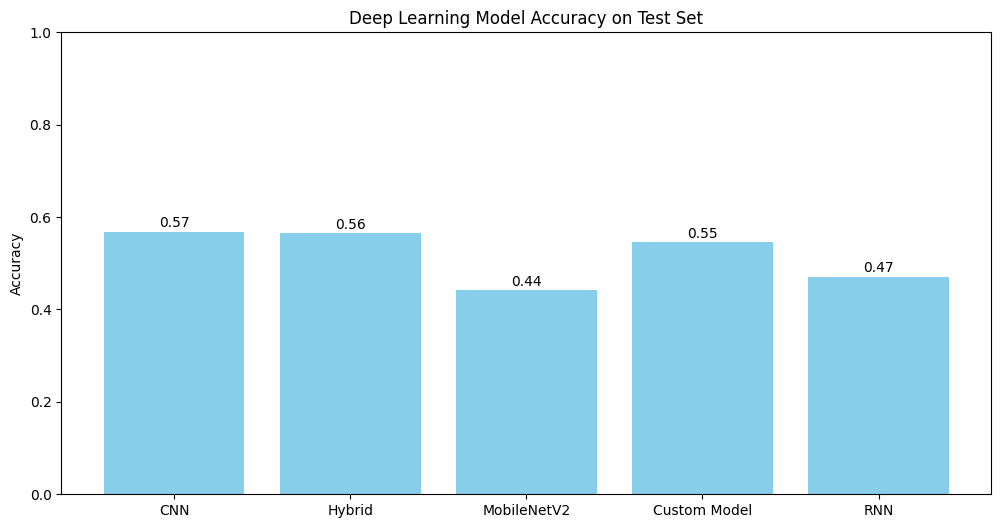

In [22]:
# -------------------------------
# Visualization: Bar chart of accuracies
# -------------------------------
plt.figure(figsize=(12, 6))
plt.bar(results_dl.keys(), results_dl.values(), color="skyblue")
plt.ylabel("Accuracy")
plt.title("Deep Learning Model Accuracy on Test Set")
plt.ylim(0, 1)
for i, v in enumerate(results_dl.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha="center")
plt.show()

In [23]:
# -------------------------------
# Evaluate all DL models
# -------------------------------
results_loss = {}
results_acc = {}

for name, (path, size, color) in dl_model_paths.items():
    print(f"\n🔹 Testing {name}...")
    X_test, y_labels = preprocess_image_folder(test_folder, target_size=size, color_mode=color)

    le = LabelEncoder()
    y_test = le.fit_transform(y_labels)

    # Convert labels to one-hot if needed
    from tensorflow.keras.utils import to_categorical
    y_test_cat = to_categorical(y_test, num_classes=len(le.classes_))

    # Load model
    model = load_model(path)

    # Evaluate
    loss, acc = model.evaluate(X_test, y_test_cat, verbose=0)
    results_loss[name] = loss
    results_acc[name] = acc

    print(f"{name} Loss: {loss:.4f} | Accuracy: {acc:.4f}")



🔹 Testing CNN...
CNN Loss: 1.1216 | Accuracy: 0.5677

🔹 Testing Hybrid...
Hybrid Loss: 1.2025 | Accuracy: 0.5645

🔹 Testing MobileNetV2...
MobileNetV2 Loss: 1.4650 | Accuracy: 0.4419

🔹 Testing Custom Model...
Custom Model Loss: 1.1781 | Accuracy: 0.5451

🔹 Testing RNN...
RNN Loss: 1.4210 | Accuracy: 0.4713


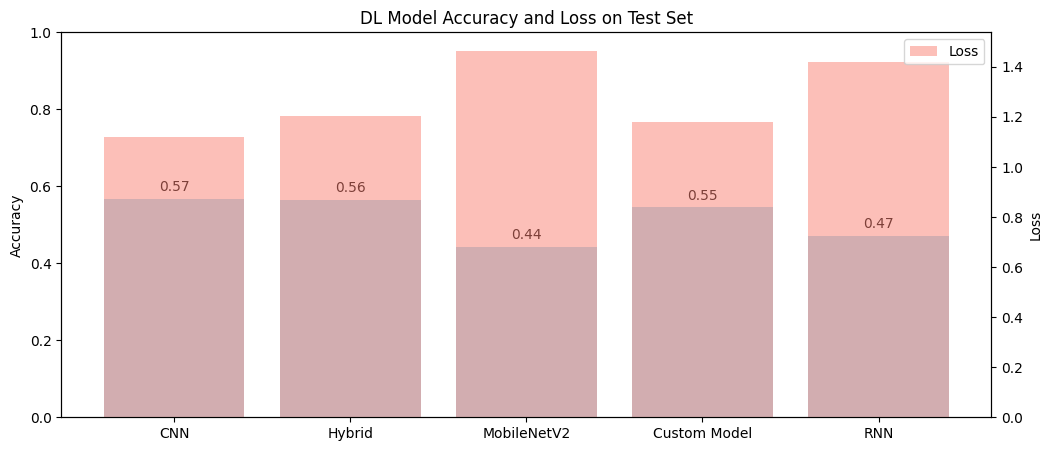

In [24]:
# -------------------------------
# Visualization: Accuracy and Loss
# -------------------------------
plt.figure(figsize=(12,5))
plt.bar(results_acc.keys(), results_acc.values(), color='skyblue', alpha=0.7, label='Accuracy')
plt.ylabel("Accuracy")
plt.ylim(0,1)
for i, v in enumerate(results_acc.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha="center")

plt.twinx()
plt.bar(results_loss.keys(), results_loss.values(), color='salmon', alpha=0.5, label='Loss')
plt.ylabel("Loss")

plt.title("DL Model Accuracy and Loss on Test Set")
plt.legend(loc='upper right')
plt.show()

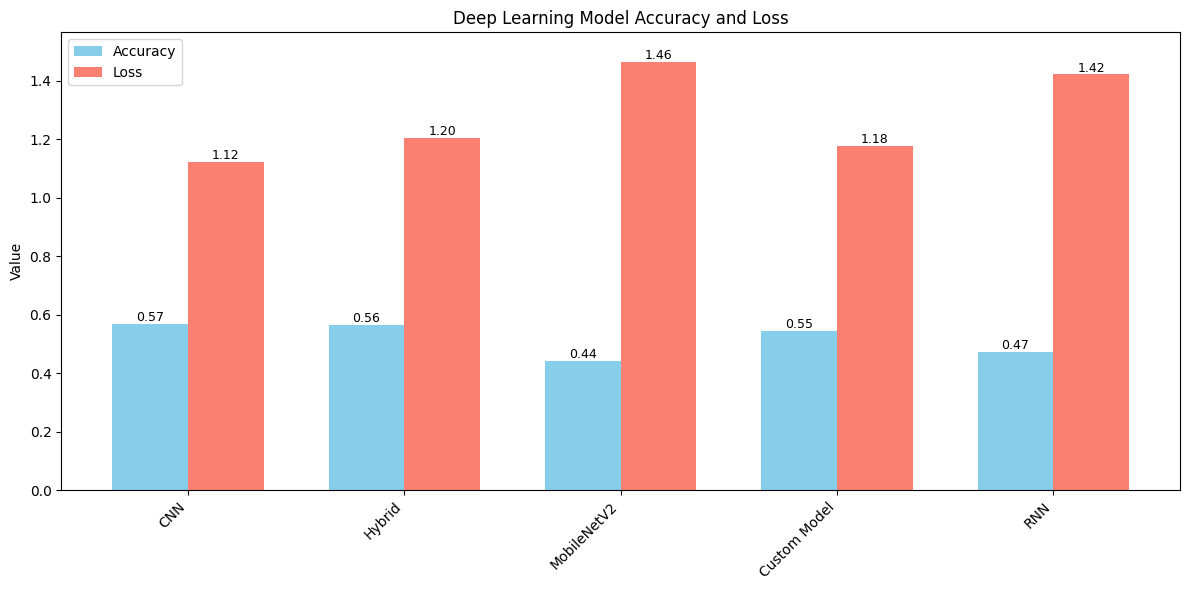

In [25]:
# -------------------------------
# Visualization: Accuracy and Loss
# -------------------------------
import matplotlib.pyplot as plt
import numpy as np

models = list(results_acc.keys())
acc_values = list(results_acc.values())
loss_values = list(results_loss.values())

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, acc_values, width, label='Accuracy', color='skyblue')
plt.bar(x + width/2, loss_values, width, label='Loss', color='salmon')

plt.ylabel('Value')
plt.title('Deep Learning Model Accuracy and Loss')
plt.xticks(x, models, rotation=45, ha='right')
plt.ylim(0, max(max(acc_values), max(loss_values)) + 0.1)

# Add value labels on bars
for i in range(len(models)):
    plt.text(x[i] - width/2, acc_values[i] + 0.01, f"{acc_values[i]:.2f}", ha='center', fontsize=9)
    plt.text(x[i] + width/2, loss_values[i] + 0.01, f"{loss_values[i]:.2f}", ha='center', fontsize=9)

plt.legend()
plt.tight_layout()
plt.show()

Testing ML Modes 

In [65]:
import os
import cv2
import numpy as np
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [66]:
# -------------------------------
# Paths to ML models
# -------------------------------
ml_model_paths = {
    "SVM Hom": r"C:\Users\kotaa\Downloads\emotion_recognition_1\emotion_recognition\svm_emotion_model.pkl",
    "Linear SVM": r"C:\Users\kotaa\Downloads\emotion_recognition_1\emotion_recognition\Linear_SVM_emotion.pkl",
    "Logistic Regression": r"C:\Users\kotaa\Downloads\emotion_recognition_1\emotion_recognition\Logistic_Regression_emotion.pkl",
    "Random Forest": r"C:\Users\kotaa\Downloads\emotion_recognition_1\emotion_recognition\Random_Forest_emotion.pkl",
    "KNN": r"C:\Users\kotaa\Downloads\emotion_recognition_1\emotion_recognition\KNN_emotion.pkl"
}

In [60]:
# -------------------------------
# PCA path
# -------------------------------
pca_path = r"C:\Users\kotaa\Downloads\emotion_recognition_1\emotion_recognition\pca_transform.pkl"
pca = joblib.load(pca_path)


In [67]:
# -------------------------------
# Test folder
# -------------------------------
test_folder = r"C:\Users\kotaa\Downloads\emotion_recognition_1\emotion_recognition\data\test"


In [68]:
# -------------------------------
# Load test images
# -------------------------------
def load_images(test_folder, size):
    images = []
    labels = []
    for label_name in os.listdir(test_folder):
        label_path = os.path.join(test_folder, label_name)
        if not os.path.isdir(label_path):
            continue
        for img_name in os.listdir(label_path):
            img_path = os.path.join(label_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            img_resized = cv2.resize(img, size)
            images.append(img_resized.flatten())
            labels.append(label_name)
    return np.array(images), np.array(labels)


In [69]:
# -------------------------------
# Prepare ML test sets
# -------------------------------
X_test_150, y_test = load_images(test_folder, (10, 15))   # 10*15=150 features
X_test_900, _ = load_images(test_folder, (30, 30))        # 30*30=900 features

le = LabelEncoder()
y_test_enc = le.fit_transform(y_test)

In [70]:
# -------------------------------
# Evaluate ML models
# -------------------------------
results_ml = {}

for name, path in ml_model_paths.items():
    print(f"\n🔹 Testing {name}...")
    model = joblib.load(path)
    
    # Select correct input size
    expected_features = model.n_features_in_
    if expected_features == 150:
        X_input = X_test_150
    elif expected_features == 900:
        X_input = X_test_900
    else:
        raise ValueError(f"Unexpected input size for {name}: {expected_features}")
    
    y_pred = model.predict(X_input)
    
    acc = accuracy_score(y_test_enc, y_pred)
    results_ml[name] = acc
    
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test_enc, y_pred, target_names=le.classes_))




🔹 Testing SVM Hom...
SVM Hom Accuracy: 0.1032
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00       958
     disgust       0.02      0.23      0.03       111
        fear       0.00      0.00      0.00      1024
       happy       0.24      0.01      0.02      1774
     neutral       0.10      0.00      0.00      1233
         sad       0.00      0.00      0.00      1247
    surprise       0.13      0.83      0.22       831

    accuracy                           0.10      7178
   macro avg       0.07      0.15      0.04      7178
weighted avg       0.09      0.10      0.03      7178


🔹 Testing Linear SVM...
Linear SVM Accuracy: 0.1435
              precision    recall  f1-score   support

       angry       0.16      0.00      0.01       958
     disgust       0.00      0.00      0.00       111
        fear       0.13      0.01      0.02      1024
       happy       0.25      0.14      0.18      1774
     neutral       0.17      0.1

c:\Users\kotaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\kotaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\kotaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

KNN Accuracy: 0.1553
              precision    recall  f1-score   support

       angry       0.13      0.36      0.19       958
     disgust       0.00      0.00      0.00       111
        fear       0.14      0.19      0.16      1024
       happy       0.23      0.15      0.18      1774
     neutral       0.16      0.20      0.18      1233
         sad       0.20      0.05      0.08      1247
    surprise       0.03      0.00      0.00       831

    accuracy                           0.16      7178
   macro avg       0.13      0.14      0.11      7178
weighted avg       0.16      0.16      0.14      7178



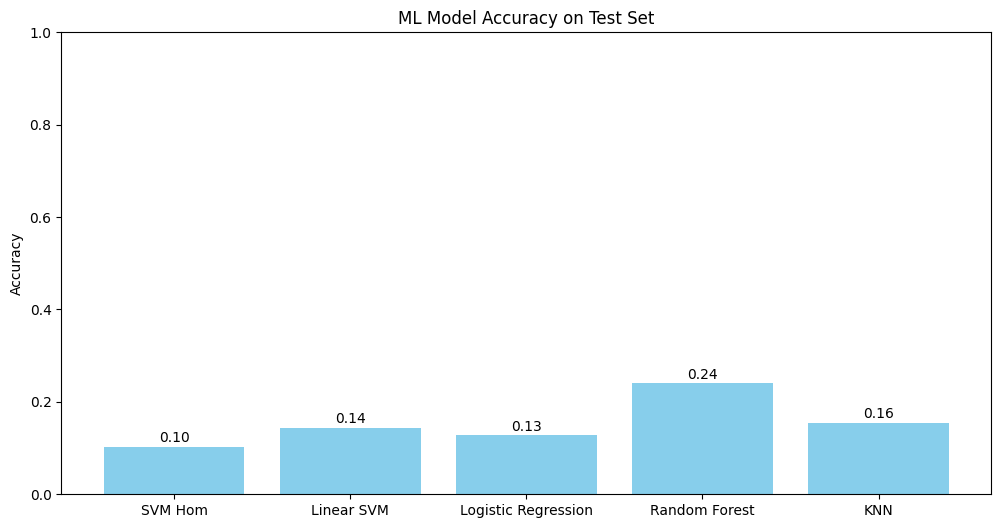

In [71]:
# -------------------------------
# Visualization
# -------------------------------
plt.figure(figsize=(12, 6))
plt.bar(results_ml.keys(), results_ml.values(), color='skyblue')
plt.ylabel("Accuracy")
plt.title("ML Model Accuracy on Test Set")
plt.ylim(0, 1)
for i, v in enumerate(results_ml.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')
plt.show()

In [74]:
# -------------------------------
# Paths to ML models
# -------------------------------
ml_model_paths = {
    "SVM Hom": r"C:\Users\kotaa\Downloads\emotion_recognition_1\emotion_recognition\svm_emotion_model.pkl",
    "Linear SVM": r"C:\Users\kotaa\Downloads\emotion_recognition_1\emotion_recognition\Linear_SVM_emotion.pkl",
    "Logistic Regression": r"C:\Users\kotaa\Downloads\emotion_recognition_1\emotion_recognition\Logistic_Regression_emotion.pkl",
    "Random Forest": r"C:\Users\kotaa\Downloads\emotion_recognition_1\emotion_recognition\Random_Forest_emotion.pkl",
    "KNN": r"C:\Users\kotaa\Downloads\emotion_recognition_1\emotion_recognition\KNN_emotion.pkl"
}

results_ml = {}

In [81]:
from sklearn.preprocessing import LabelEncoder

# Suppose y_test contains your true labels as strings (e.g., "happy", "sad", etc.)
le = LabelEncoder()
le.fit(y_test)             # Fit encoder on test labels
y_test_enc = le.transform(y_test)  # Encode labels as integers

# X_test_dict stores different versions of X_test according to feature count
X_test_dict = {
    150: X_test_150,  # 150-feature test data
    900: X_test_900,  # 900-feature test data
    # Add more if needed
}

results_ml = {}

for name, path in ml_model_paths.items():
    model = joblib.load(path)
    expected_features = model.n_features_in_  # number of features model expects
    X_input = X_test_dict[expected_features]  # pick correct test set

    y_pred = model.predict(X_input)
    acc = accuracy_score(y_test_enc, y_pred)
    err = 1 - acc  # treat error as “loss”
    results_ml[name] = {"accuracy": acc, "loss": err}

    print(f"{name} -> Accuracy: {acc:.4f}, Loss/Error: {err:.4f}")
    print(classification_report(y_test_enc, y_pred, target_names=le.classes_))


SVM Hom -> Accuracy: 0.1032, Loss/Error: 0.8968
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00       958
     disgust       0.02      0.23      0.03       111
        fear       0.00      0.00      0.00      1024
       happy       0.24      0.01      0.02      1774
     neutral       0.10      0.00      0.00      1233
         sad       0.00      0.00      0.00      1247
    surprise       0.13      0.83      0.22       831

    accuracy                           0.10      7178
   macro avg       0.07      0.15      0.04      7178
weighted avg       0.09      0.10      0.03      7178

Linear SVM -> Accuracy: 0.1435, Loss/Error: 0.8565
              precision    recall  f1-score   support

       angry       0.16      0.00      0.01       958
     disgust       0.00      0.00      0.00       111
        fear       0.13      0.01      0.02      1024
       happy       0.25      0.14      0.18      1774
     neutral       0.17      0.11

c:\Users\kotaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\kotaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\kotaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

KNN -> Accuracy: 0.1553, Loss/Error: 0.8447
              precision    recall  f1-score   support

       angry       0.13      0.36      0.19       958
     disgust       0.00      0.00      0.00       111
        fear       0.14      0.19      0.16      1024
       happy       0.23      0.15      0.18      1774
     neutral       0.16      0.20      0.18      1233
         sad       0.20      0.05      0.08      1247
    surprise       0.03      0.00      0.00       831

    accuracy                           0.16      7178
   macro avg       0.13      0.14      0.11      7178
weighted avg       0.16      0.16      0.14      7178



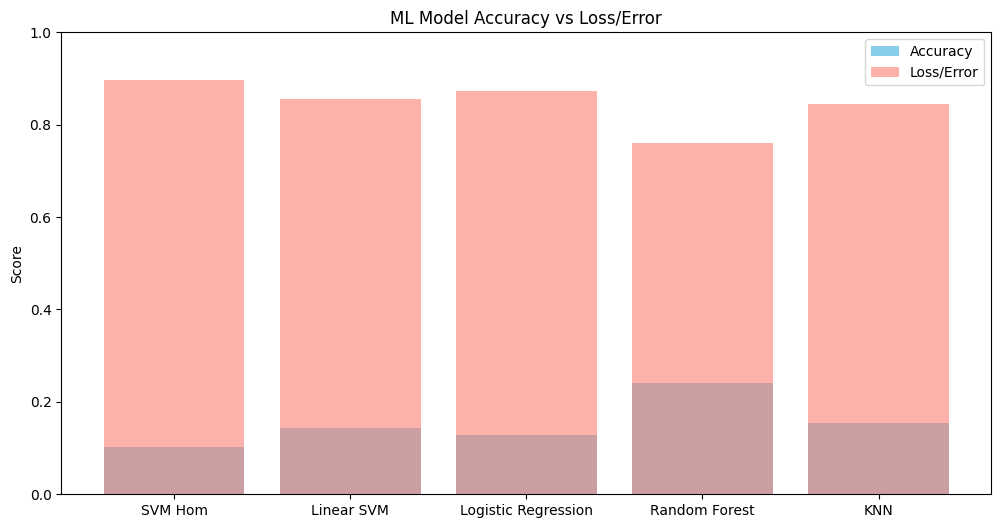

In [82]:
# Visualization: Accuracy vs Loss
model_names = list(results_ml.keys())
accuracies = [results_ml[m]["accuracy"] for m in model_names]
losses = [results_ml[m]["loss"] for m in model_names]

plt.figure(figsize=(12,6))
plt.bar(model_names, accuracies, color='skyblue', label='Accuracy')
plt.bar(model_names, losses, color='salmon', alpha=0.6, label='Loss/Error')
plt.ylabel("Score")
plt.title("ML Model Accuracy vs Loss/Error")
plt.ylim(0,1)
plt.legend()
plt.show()

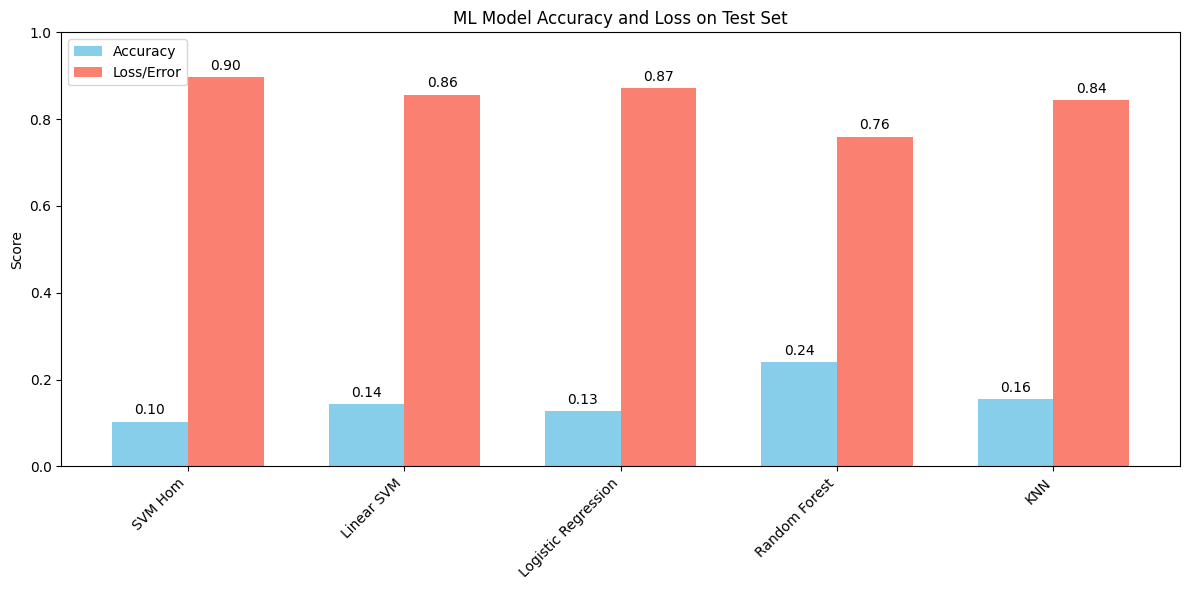

In [83]:
import matplotlib.pyplot as plt
import numpy as np

# Extract model names, accuracies, and losses from results_ml
model_names = list(results_ml.keys())
accuracies = [results_ml[name]["accuracy"] for name in model_names]
losses = [results_ml[name]["loss"] for name in model_names]

# Set the positions and width for the bars
x = np.arange(len(model_names))
width = 0.35

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot accuracy and loss side by side
rects1 = ax.bar(x - width/2, accuracies, width, label='Accuracy', color='skyblue')
rects2 = ax.bar(x + width/2, losses, width, label='Loss/Error', color='salmon')

# Add labels, title, and ticks
ax.set_ylabel('Score')
ax.set_title('ML Model Accuracy and Loss on Test Set')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.set_ylim(0, 1)
ax.legend()

# Add value labels on top of bars
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


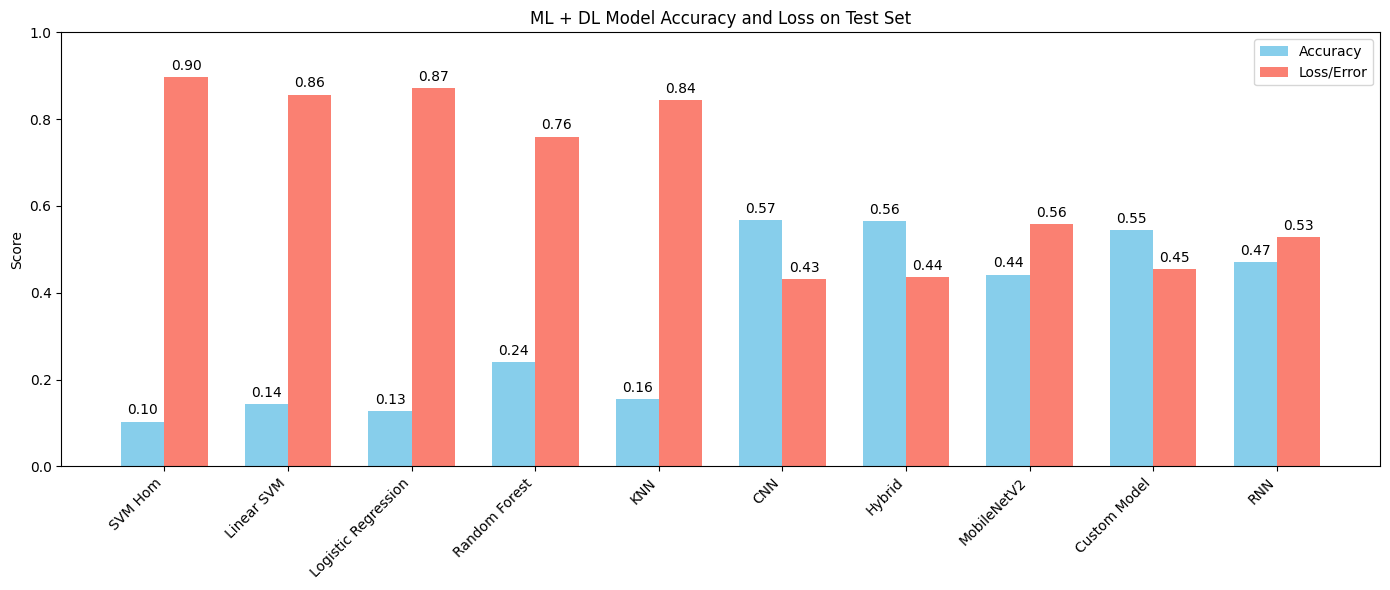

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# Combine ML and DL results
# -------------------------------
# DL: results_dl = { "CNN": acc, "Hybrid": acc, ... }  (only accuracy)
# We'll calculate loss for DL as 1 - accuracy
results_dl_combined = {name: {"accuracy": acc, "loss": 1-acc} for name, acc in results_dl.items()}

# Merge ML and DL
results_combined = {**results_ml, **results_dl_combined}

# Extract values for plotting
model_names = list(results_combined.keys())
accuracies = [results_combined[name]["accuracy"] for name in model_names]
losses = [results_combined[name]["loss"] for name in model_names]

# Bar positions
x = np.arange(len(model_names))
width = 0.35

# Plot
fig, ax = plt.subplots(figsize=(14, 6))
rects1 = ax.bar(x - width/2, accuracies, width, label='Accuracy', color='skyblue')
rects2 = ax.bar(x + width/2, losses, width, label='Loss/Error', color='salmon')

# Labels & title
ax.set_ylabel('Score')
ax.set_title('ML + DL Model Accuracy and Loss on Test Set')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.set_ylim(0, 1)
ax.legend()

# Value labels
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()
